# Exploring Data Analysis

In this first stage we will identify the quality of the dataset, such as there is missing values, wrong measurements, the vacations gaps and the others that can impact in our time serie. It's important identify the assess features quality, sazonalities, ciclical moviments, the correlation about the variables and get an idea on the univariate statistics such as minimum, maximum, standard deviation, mean and median.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import datetime

In [2]:
df = pd.read_csv("Data//ITUB4 Dados Históricos.csv",sep=",",decimal=",")
df.columns = ['Date','Close','Open','High','Low', 'Vol','Var']
df.shape

(4968, 7)

In [3]:
df.head()

,Date,Close,Open,High,Low,Vol,Var
0,04.05.2020,21.89,21.95,22.09,21.78,"31,75M","-3,86%"
1,30.04.2020,22.77,22.59,23.33,22.46,"46,09M","-3,76%"
2,29.04.2020,23.66,24.00,24.12,23.16,"31,29M","1,33%"
3,28.04.2020,23.35,22.98,23.61,22.59,"57,88M","8,25%"
4,27.04.2020,21.57,21.54,22.14,21.10,"38,29M","3,30%"


### Emptiness
Let's check if there's some **nan** values in the Dataframe.

In [4]:
df.isnull().values.any()

False

### Data types
Check with the data types of columns matching their content.

In [5]:
df.dtypes

Date      object
Close    float64
Open     float64
High     float64
Low      float64
Vol       object
Var       object
dtype: object

We can notice that the Date, Vol and Var% need to be casting to date time, float and float respectively.  
Converting the Date column using **to_datetime** to garanting the format in the time serie.

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d.%m.%Y')

In the Vol column we need to transform the M in Millions (10⁶) to we can use this and get a correlation.

In [7]:
df.Vol = (df.Vol.replace(r',', '.', regex=True).replace(r'[KM]+$', '', regex=True).astype(float) * \
            df.Vol.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['K','M'], [10**3, 10**6]).astype(int))

The Var column needs to replace % for none and ',' for '.' to be casting to float.

In [8]:
df['Var'] = df["Var"].str.replace('%','',regex=True).replace(',','.',regex=True).astype(float)

In [9]:
df.head()

,Date,Close,Open,High,Low,Vol,Var
0,2020-05-04,21.89,21.95,22.09,21.78,31750000.0,-3.86
1,2020-04-30,22.77,22.59,23.33,22.46,46090000.0,-3.76
2,2020-04-29,23.66,24.00,24.12,23.16,31290000.0,1.33
3,2020-04-28,23.35,22.98,23.61,22.59,57880000.0,8.25
4,2020-04-27,21.57,21.54,22.14,21.10,38290000.0,3.30


### Ranges
Lets computes a summary of statistics pertaining to the DataFrame columns with the function **describe()** and the next step is plot the boxplot to obtain the same information with data vizualization. The goal is check if the range of each columns make sense.

In [10]:
df.describe()

,Close,Open,High,Low,Vol,Var
count,4968.000000,4968.000000,4968.000000,4968.000000,4.968000e+03,4968.000000
mean,11.419726,11.422480,11.569746,11.263259,2.960777e+07,0.079217
std,8.902502,8.908701,9.007277,8.798432,3.440288e+07,2.286837
min,1.180000,1.180000,1.180000,1.110000,1.130000e+06,-12.060000
25%,4.347500,4.340000,4.397500,4.300000,1.199000e+07,-1.242500
50%,9.915000,9.940000,10.065000,9.745000,1.936500e+07,0.000000
75%,14.572500,14.582500,14.780000,14.370000,3.489750e+07,1.260000
max,36.850000,36.410000,37.050000,36.280000,8.410500e+08,23.230000


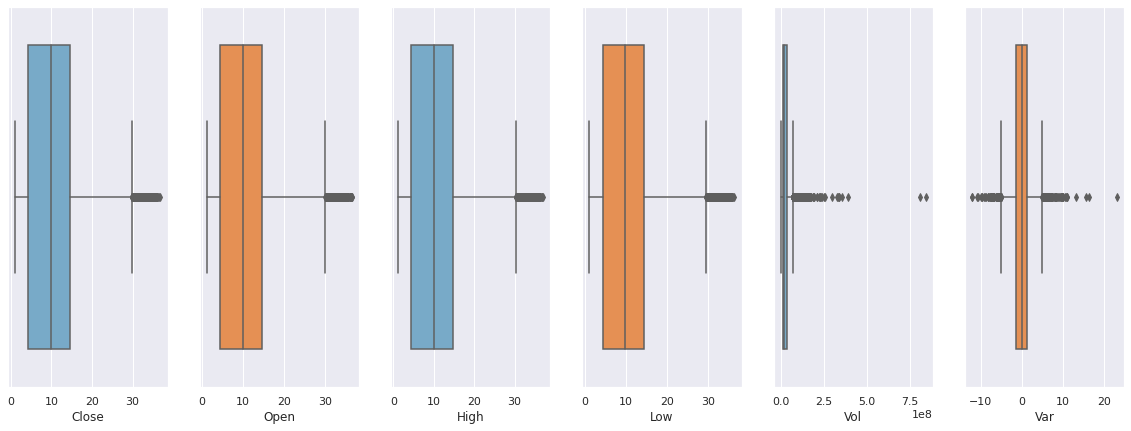

In [11]:
fig, (ax1, ax2,ax3,ax4,ax5,ax6) = plt.subplots(ncols=6, sharey=True,figsize=(20, 7))
sns.boxplot(x="Close",data=df, ax=ax1,palette = 'Blues')
sns.boxplot(x="Open",data=df, ax=ax2, palette = 'Oranges')
sns.boxplot(x="High",data=df, ax=ax3, palette = 'Blues')
sns.boxplot(x="Low",data=df, ax=ax4, palette = 'Oranges')
sns.boxplot(x="Vol",data=df, ax=ax5, palette = 'Blues')
sns.boxplot(x="Var",data=df, ax=ax6, palette = 'Oranges')


plt.show()

all variables seem suitable.

### Time Series

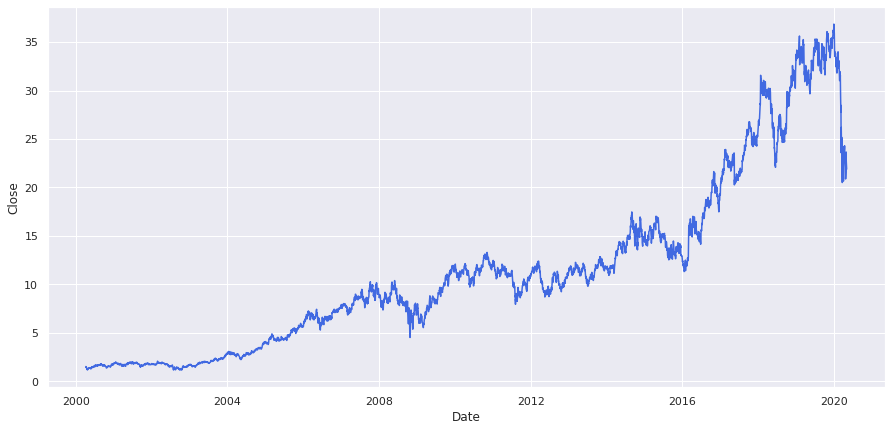

In [12]:
dim = (15, 7)
fig, ax = plt.subplots(figsize=dim)
ax = sns.lineplot(x="Date", y="Close", color = 'royalblue',data=df)

We can notice that there is a drop in the beginnin of 2020, it must be due the pandemic Covid-19 and we need to consider it as an exogenous factor in our analysis, clearly a bearmarket.  <br>
For to draft a notion a seasonality and cyclical periods we need to create Day of Week, Week of year and Quarter columns.

In [13]:
df['DayofWeek'] = df['Date'].dt.dayofweek
df['Weekofyear'] = df['Date'].dt.week
df['Quarter'] = df['Date'].dt.quarter
df['month'] = df['Date'].dt.month
df.head(10)

,Date,Close,Open,High,Low,Vol,Var,DayofWeek,Weekofyear,Quarter,month
0,2020-05-04,21.89,21.95,22.09,21.78,31750000.0,-3.86,0,19,2,5
1,2020-04-30,22.77,22.59,23.33,22.46,46090000.0,-3.76,3,18,2,4
2,2020-04-29,23.66,24.00,24.12,23.16,31290000.0,1.33,2,18,2,4
3,2020-04-28,23.35,22.98,23.61,22.59,57880000.0,8.25,1,18,2,4
4,2020-04-27,21.57,21.54,22.14,21.10,38290000.0,3.30,0,18,2,4
5,2020-04-24,20.88,21.74,21.82,20.37,68490000.0,-5.31,4,17,2,4
6,2020-04-23,22.05,22.66,22.74,21.84,41010000.0,-1.43,3,17,2,4
7,2020-04-22,22.37,22.40,23.13,22.21,47810000.0,-1.19,2,17,2,4
8,2020-04-20,22.64,22.72,22.97,22.50,28380000.0,-2.50,0,17,2,4
9,2020-04-17,23.22,23.44,23.61,22.61,25100000.0,1.80,4,16,2,4


The next step is to analyze the univariate statistics, which can give us a basic understanding of the behavior of the data.  
We can obtain the basic information about the dataset that we're working. The most important things we have in this moment is the Close Price Column:

&emsp;&emsp; 25% of the shares has a price below 4.34 Reais.  
&emsp;&emsp; 50% of the shares has a price below 9.915 Reais.  
&emsp;&emsp; 75% of the shares has a price below 14.57 Reais.

So we can notice that the median price is 9.915, but we have to be care, because a possibility there is a trend due the outliers.
So to a better understanding about Quartis, we can use the boxplot.

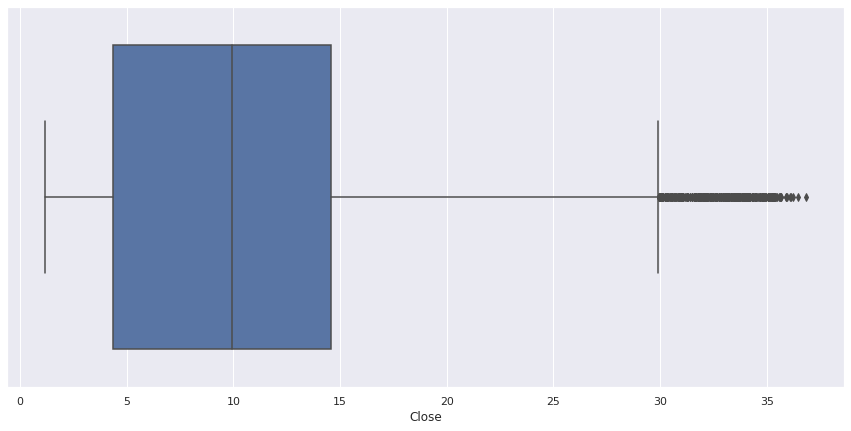

In [14]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x="Close", data=df )

Now let's get the correlation about the values of these dataframe. I with my newbie vision about the stock market expect the high positive correlation about the Close and Open price and a high inverse linear relationship between Close and Volume, based on the first rule of the market **"Supply and demand"**.

In [15]:
Variables = df[['Close','Open','Vol','High','Low']]
Matrix = Variables.corr()
Matrix

,Close,Open,Vol,High,Low
Close,1.000000,0.999639,-0.298841,0.999837,0.999834
Open,0.999639,1.000000,-0.298931,0.999830,0.999817
Vol,-0.298841,-0.298931,1.000000,-0.298094,-0.299613
High,0.999837,0.999830,-0.298094,1.000000,0.999778
Low,0.999834,0.999817,-0.299613,0.999778,1.000000


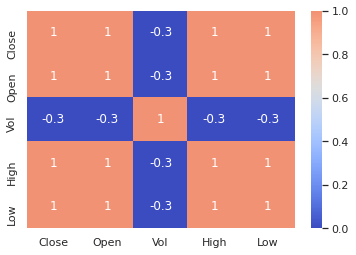

In [17]:
midpoint = (Matrix.values.max() - Matrix.values.min()) / 2
p = sns.heatmap(Matrix, cmap='coolwarm', center=midpoint, vmin=-0, vmax=1, annot=True)

For the experts in the stock market, this is obvious and a bullshit, but I as a Junior Data Scientist need to conclude on my own, and as expect the high positive correlation and the inverse correlation were found. I confess that I expected a higher inverse correlation between the Price and Volume.

So now, let's try to identify the sazonality and cicles using DayofWeek, Weekofyear and Quarter columns, it is important to understand the behavior of the stock price at a certain time of the year.

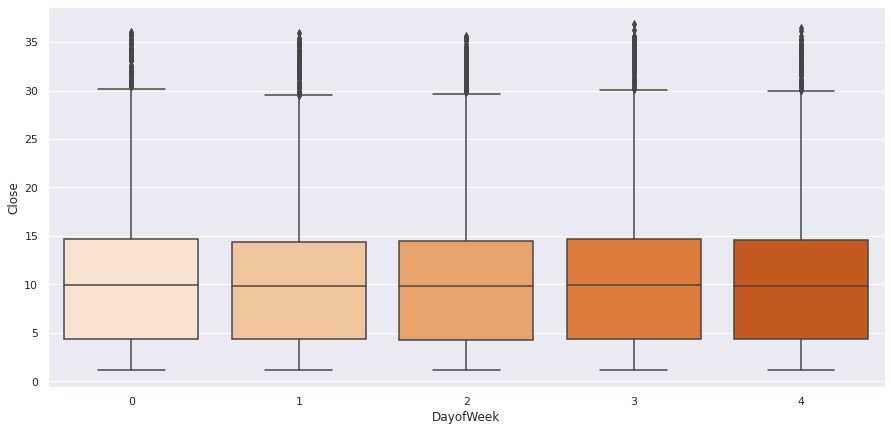

In [18]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x="DayofWeek", y="Close",palette=sns.color_palette("Oranges"), data=df, fliersize=5)

unlike the video game market that I explored in previous analyzes, where it has a seasonality of higher sales during weekends, the stock market does not show this variation, so the prices don't fluctuate during the week.


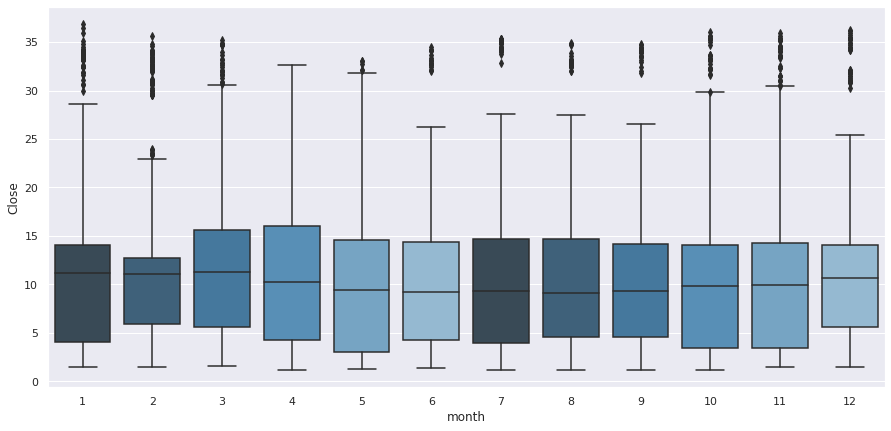

In [19]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x="month", y="Close",palette=sns.color_palette("Blues_d"), data=df, fliersize=5)

In [20]:
df.head()

,Date,Close,Open,High,Low,Vol,Var,DayofWeek,Weekofyear,Quarter,month
0,2020-05-04,21.89,21.95,22.09,21.78,31750000.0,-3.86,0,19,2,5
1,2020-04-30,22.77,22.59,23.33,22.46,46090000.0,-3.76,3,18,2,4
2,2020-04-29,23.66,24.00,24.12,23.16,31290000.0,1.33,2,18,2,4
3,2020-04-28,23.35,22.98,23.61,22.59,57880000.0,8.25,1,18,2,4
4,2020-04-27,21.57,21.54,22.14,21.10,38290000.0,3.30,0,18,2,4


The 3th until 5th month of year, isn't a good a idea to buy a share, we can see clearly that is where the peak of price is located, but we're looking through the years, so it's more interest look all month during a period.

In [21]:
df = df.set_index('Date')
df['per'] = df.index.to_period('M')


In [22]:
df.tail(15)

,Close,Open,High,Low,Vol,Var,DayofWeek,Weekofyear,Quarter,month,per
Date,,,,,,,,,,,
2000-04-26,1.28,1.30,1.30,1.26,56530000.0,2.40,2,17,2,4,2000-04
2000-04-25,1.25,1.23,1.26,1.21,52090000.0,3.31,1,17,2,4,2000-04
2000-04-24,1.21,1.25,1.25,1.20,44780000.0,-3.20,0,17,2,4,2000-04
2000-04-20,1.25,1.21,1.25,1.21,23430000.0,3.31,3,16,2,4,2000-04
2000-04-19,1.21,1.30,1.30,1.20,70470000.0,-4.72,2,16,2,4,2000-04
2000-04-18,1.27,1.27,1.31,1.26,68250000.0,1.60,1,16,2,4,2000-04
2000-04-17,1.25,1.32,1.32,1.20,42950000.0,-5.30,0,16,2,4,2000-04
2000-04-14,1.32,1.33,1.37,1.30,22070000.0,-4.35,4,15,2,4,2000-04
2000-04-13,1.38,1.44,1.45,1.36,12360000.0,-5.48,3,15,2,4,2000-04


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

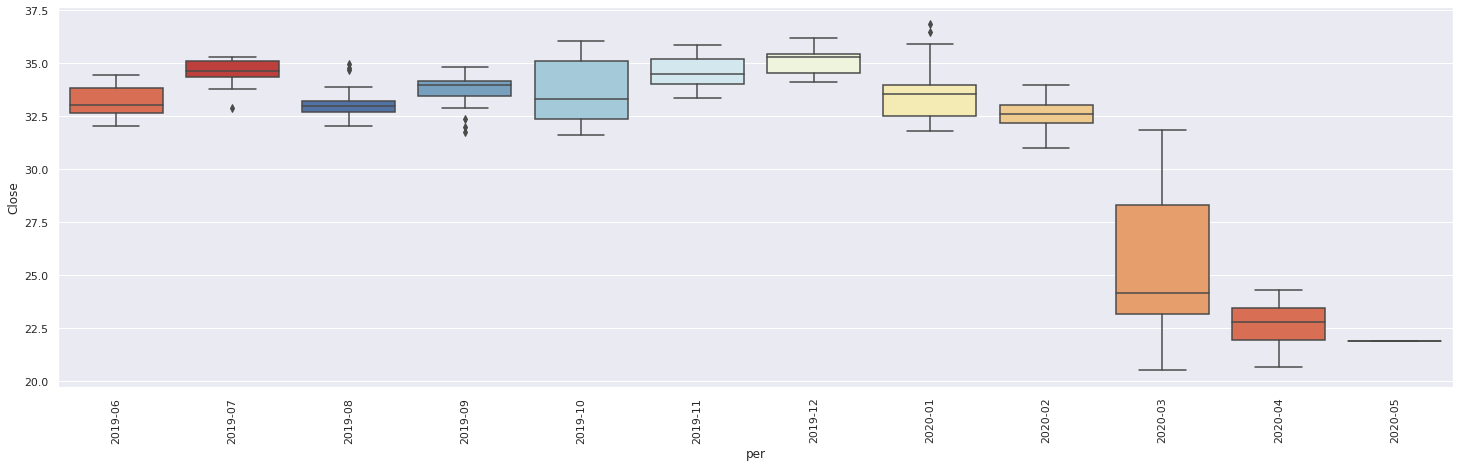

In [23]:
fig, ax = plt.subplots(figsize=(25,7))
sns.set(font_scale = 2)
ax = sns.boxplot(x="per", y="Close",palette=sns.color_palette("RdYlBu", 10), data=df[df['per'] >= "2019-06"], fliersize=5).invert_xaxis()
plt.xticks(rotation=90)

In 2019-06 until 2019-12 we could notice that there's a weak stacionarity, but in january when the coronavirus cases starting to growth the bearmarket start to act, after that we can wait for a bulltrap, that is a false signal of prosperity trend in share price.

The data analysis will continue in the next steps, let's make it a little more interesting by adding the market scenario variables through the news.